# Data Cleaning Exercise

Cleaning your data is crucial when starting a new data engineering project because it ensures the accuracy, consistency, and reliability of the dataset. Dirty data, which may include duplicates, missing values, and errors, can lead to incorrect analysis and insights, ultimately affecting the decision-making process. Data cleaning helps in identifying and rectifying these issues, providing a solid foundation for building effective data models and analytics. Additionally, clean data improves the performance of algorithms and enhances the overall efficiency of the project, leading to more trustworthy and actionable results.

Use Python, ```numpy```, ```pandas``` and/or ```matplotlib``` to analyse and clean your batch data:

## Import Libraries

In [1]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

Link to data source: https://www.kaggle.com/datasets/pavan9065/top-100-most-streamed-songs-on-spotify

In [2]:
#
df = pd.read_csv('Top_100_most_Streamed.csv')

## Understand the Data

View the first few rows, get summary statistics and check data types

In [3]:
# TODO

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             100 non-null    object
 1   artist            100 non-null    object
 2   top genre         100 non-null    object
 3   year              100 non-null    int64 
 4   beats.per.minute  100 non-null    int64 
 5   energy            100 non-null    int64 
 6   danceability      100 non-null    int64 
 7   loudness.dB       100 non-null    int64 
 8   liveness          100 non-null    int64 
 9   valance           100 non-null    int64 
 10  length            100 non-null    int64 
 11  acousticness      100 non-null    int64 
 12  speechiness       100 non-null    int64 
 13  popularity        100 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 11.1+ KB


,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity
0,Blinding Lights,The Weeknd,canadian contemporary r&b,2020,171,73,51,-6,9,33,200,0,6,91
1,Watermelon Sugar,Harry Styles,pop,2019,95,82,55,-4,34,56,174,12,5,88
2,Mood (feat. iann dior),24kGoldn,cali rap,2021,91,72,70,-4,32,73,141,17,4,88
3,Someone You Loved,Lewis Capaldi,pop,2019,110,41,50,-6,11,45,182,75,3,86
4,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,86


## Handle Missing Data

Identify missing values and fill or drop missing values

In [4]:
# TODO


missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


df = df.dropna()


print("Remaining missing values:\n", df.isnull().sum())

Missing values per column:
 title               0
artist              0
top genre           0
year                0
beats.per.minute    0
energy              0
danceability        0
loudness.dB         0
liveness            0
valance             0
length              0
acousticness        0
speechiness         0
popularity          0
dtype: int64
Remaining missing values:
 title               0
artist              0
top genre           0
year                0
beats.per.minute    0
energy              0
danceability        0
loudness.dB         0
liveness            0
valance             0
length              0
acousticness        0
speechiness         0
popularity          0
dtype: int64


## Handle Duplicates

Identify duplicates and remove them

In [5]:
# TODO
import pandas as pd

duplicates = df.duplicated(subset=['title', 'artist'], keep=False)
print("Number of duplicates:", duplicates.sum())


display(df[duplicates].head())


df = df.drop_duplicates(subset=['title', 'artist'], keep='first')
print("Number of rows after removing duplicates:", len(df))


Number of duplicates: 0


,title,artist,top genre,year,beats.per.minute,energy,danceability,loudness.dB,liveness,valance,length,acousticness,speechiness,popularity


Number of rows after removing duplicates: 100


## Handle Outliers

Identify outliers and remove or corret them

In [6]:
# TODO


def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]



df = remove_outliers_iqr(df, 'popularity')
df = remove_outliers_iqr(df, 'beats.per.minute')
df = remove_outliers_iqr(df, 'valance')
df = remove_outliers_iqr(df, 'length')

print("Number of rows after removing outliers:", len(df))


Number of rows after removing outliers: 84


## Handle Incorrect Data Types

In [7]:
# TODO
import pandas as pd
df['release_date'] = pd.to_datetime(df['year'], format='%Y')
print(df.dtypes)

title                       object
artist                      object
top genre                   object
year                         int64
beats.per.minute             int64
energy                       int64
danceability                 int64
loudness.dB                  int64
liveness                     int64
valance                      int64
length                       int64
acousticness                 int64
speechiness                  int64
popularity                   int64
release_date        datetime64[ns]
dtype: object


## Visualize Data

Use graphes, plots and/or diagrams to visualize the data

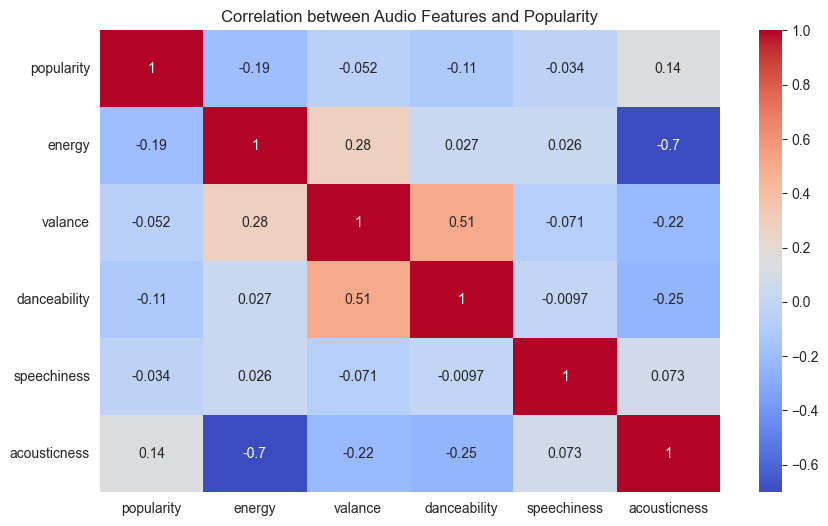

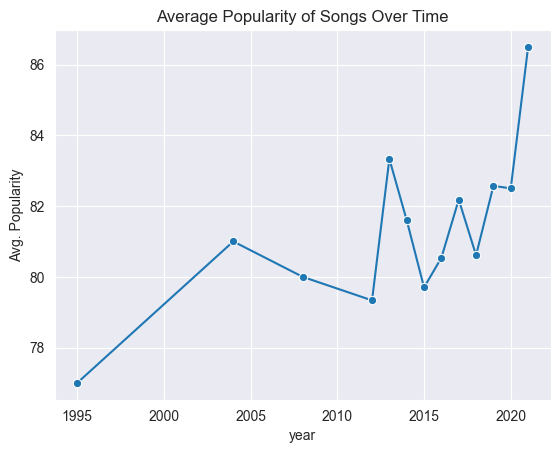

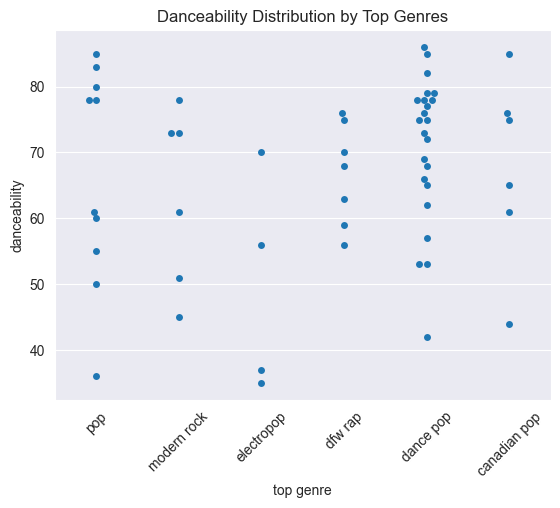

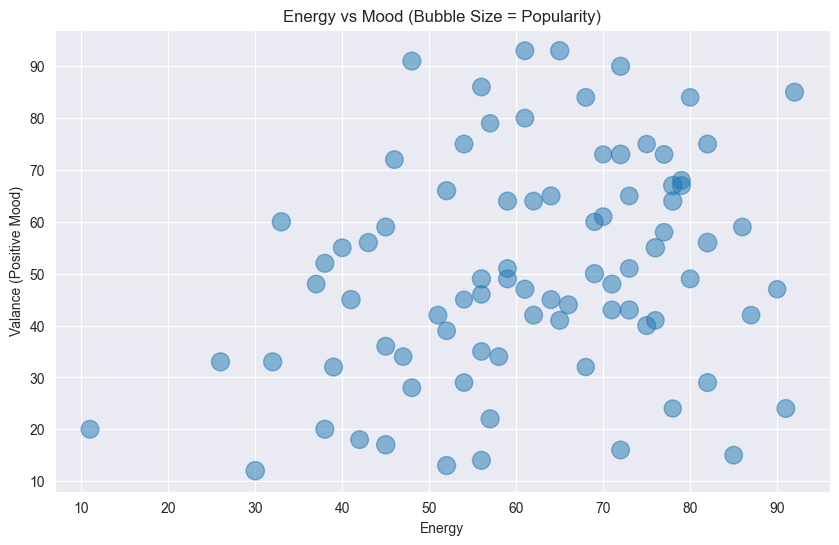

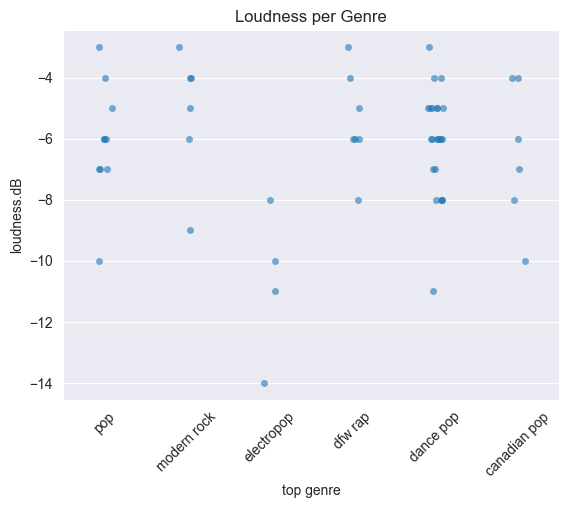

In [9]:
# TODO
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
features = ['popularity', 'energy', 'valance', 'danceability', 'speechiness', 'acousticness']
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Audio Features and Popularity")
plt.show()

import seaborn as sns

pop_per_year = df.groupby('year')['popularity'].mean().reset_index()

sns.lineplot(x='year', y='popularity', data=pop_per_year, marker='o')
plt.title("Average Popularity of Songs Over Time")
plt.ylabel("Avg. Popularity")
plt.grid(True)
plt.show()

top_genres = df['top genre'].value_counts().nlargest(6).index
subset = df[df['top genre'].isin(top_genres)]

sns.swarmplot(x='top genre', y='danceability', data=subset)
plt.title("Danceability Distribution by Top Genres")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(df['energy'], df['valance'], s=df['popularity']*2, alpha=0.5)
plt.xlabel("Energy")
plt.ylabel("Valance (Positive Mood)")
plt.title("Energy vs Mood (Bubble Size = Popularity)")
plt.grid(True)
plt.show()

sns.stripplot(x='top genre', y='loudness.dB', data=subset, jitter=True, alpha=0.6)
plt.title("Loudness per Genre")
plt.xticks(rotation=45)
plt.show()



## Save Cleaned Data

In [11]:
# TODO
# Save the cleaned dataset
df.to_csv('top100_cleaned.csv', index=False)
print("Cleaned data saved to 'top100_cleaned.csv'")


Cleaned data saved to 'top100_cleaned.csv'
